In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
import os

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sanchitagholap/crop-and-fertilizer-dataset-for-westernmaharashtra")

100%|██████████| 19.6k/19.6k [00:00<00:00, 5.94MB/s]

Extracting files...


In [ ]:
csv_file_path = os.path.join(path, 'Crop and fertilizer dataset.csv')

# Read the dataset using the constructed path
dataset = pd.read_csv(csv_file_path)

print(dataset.head())
dataset.drop(columns=['Link'], inplace=True)
dataset.head(5)

  District_Name Soil_color  Nitrogen  Phosphorus  Potassium   pH  Rainfall  \
0      Kolhapur      Black        75          50        100  6.5      1000   
1      Kolhapur      Black        80          50        100  6.5      1000   
2      Kolhapur      Black        85          50        100  6.5      1000   
3      Kolhapur      Black        90          50        100  6.5      1000   
4      Kolhapur      Black        95          50        100  6.5      1000   

   Temperature       Crop Fertilizer                          Link  
0           20  Sugarcane       Urea  https://youtu.be/2t5Am0xLTOo  
1           20  Sugarcane       Urea  https://youtu.be/2t5Am0xLTOo  
2           20  Sugarcane       Urea  https://youtu.be/2t5Am0xLTOo  
3           20  Sugarcane       Urea  https://youtu.be/2t5Am0xLTOo  
4           20  Sugarcane       Urea  https://youtu.be/2t5Am0xLTOo  


,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea


In [ ]:
# Exclude non-numeric columns
numeric_dataset = dataset.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr = numeric_dataset.corr()
print(corr)

             Nitrogen  Phosphorus  Potassium        pH  Rainfall  Temperature
Nitrogen     1.000000    0.709539   0.584315  0.182850  0.269364    -0.010213
Phosphorus   0.709539    1.000000   0.573970  0.244945  0.225453    -0.055303
Potassium    0.584315    0.573970   1.000000  0.075110  0.445671     0.053413
pH           0.182850    0.244945   0.075110  1.000000  0.097884    -0.002949
Rainfall     0.269364    0.225453   0.445671  0.097884  1.000000     0.315045
Temperature -0.010213   -0.055303   0.053413 -0.002949  0.315045     1.000000


<Axes: >

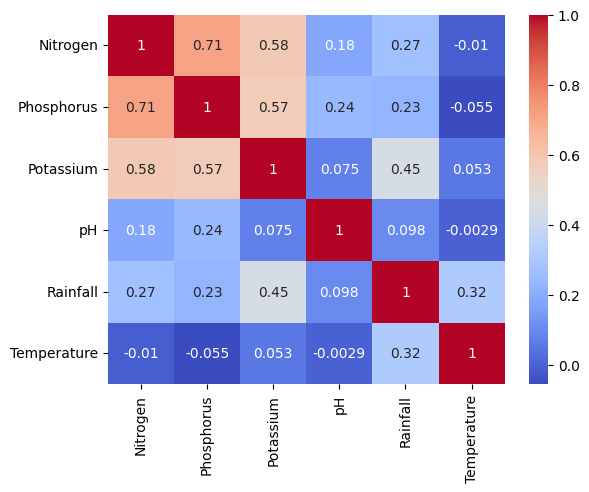

In [ ]:
sns.heatmap((dataset.drop(columns=['Crop', 'Fertilizer', 'District_Name',	'Soil_color'])).corr(), annot=True,cbar=True , cmap='coolwarm')

In [ ]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print(sk.__version__)

1.6.1


In [ ]:
encoder1, encoder2 = LabelEncoder(), LabelEncoder()
District = encoder1.fit_transform(dataset['District_Name'])
Soil = encoder2.fit_transform(dataset['Soil_color'])

In [ ]:
crops = np.unique(dataset['Crop'].values)
map_crops = np.transpose([crops, [i for i in range(len(crops))]])
map_crops

array([['Cotton', 0],
       ['Ginger', 1],
       ['Gram', 2],
       ['Grapes', 3],
       ['Groundnut', 4],
       ['Jowar', 5],
       ['Maize', 6],
       ['Masoor', 7],
       ['Moong', 8],
       ['Rice', 9],
       ['Soybean', 10],
       ['Sugarcane', 11],
       ['Tur', 12],
       ['Turmeric', 13],
       ['Urad', 14],
       ['Wheat', 15]], dtype=object)

In [ ]:
fertilizers = np.unique(dataset['Fertilizer'].values)
map_fertilizers = np.transpose([fertilizers, [i for i in range(len(fertilizers))]])
map_fertilizers

array([['10:10:10 NPK', 0],
       ['10:26:26 NPK', 1],
       ['12:32:16 NPK', 2],
       ['13:32:26 NPK', 3],
       ['18:46:00 NPK', 4],
       ['19:19:19 NPK', 5],
       ['20:20:20 NPK', 6],
       ['50:26:26 NPK', 7],
       ['Ammonium Sulphate', 8],
       ['Chilated Micronutrient', 9],
       ['DAP', 10],
       ['Ferrous Sulphate', 11],
       ['Hydrated Lime', 12],
       ['MOP', 13],
       ['Magnesium Sulphate', 14],
       ['SSP', 15],
       ['Sulphur', 16],
       ['Urea', 17],
       ['White Potash', 18]], dtype=object)

In [ ]:
X = np.column_stack((District, Soil, dataset.iloc[:, 2:8].values))
y = dataset.iloc[:, 8:].values

y_crop = []
for crop in y[:, 0]:
    for i in map_crops:
        if crop == i[0]:
            y_crop.append(i[1])

y_fert = []
for fert in y[:, 1]:
    for i in map_fertilizers:
        if fert == i[0]:
            y_fert.append(i[1])

y_numeric = np.transpose(np.array([y_crop, y_fert]))

X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.25, random_state=42)

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
# accuracy_score(y_test, y_pred)
# print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test[:, 0], y_pred[:, 0]))

print(accuracy_score(y_test[:, 1], y_pred[:, 1]))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       177
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        50
           5       1.00      1.00      1.00        81
           6       1.00      0.99      0.99        86
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        83
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00       255
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00        29
          15       0.99      1.00      1.00       229

    accuracy                           1.00      1129
   macro avg       1.00   

In [ ]:
from sklearn.multioutput import MultiOutputClassifier

model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

model_tuned = MultiOutputClassifier(GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3))
model_tuned.fit(X_train, y_train)
# Evaluate the model (optional, but good practice)
from sklearn.metrics import accuracy_score, classification_report



y_pred_rf = model.predict(X_test)
y_pred_gb = model_tuned.predict(X_test)
accuracy_rf = accuracy_score(y_test[:,0], y_pred_rf[:,0])
accuracy_gb = accuracy_score(y_test[:,0], y_pred_gb[:,0])

print(f"Random forest Accuracy: {accuracy_rf}")
print(f"Gradient Boosting Accuracy: {accuracy_gb}")
# print(classification_report(y_test, y_pred))



Random forest Accuracy: 0.9973427812223207
Gradient Boosting Accuracy: 0.9991142604074402


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# ... (previous code for data loading and splitting)

# Instantiate different models
logreg_model = MultiOutputClassifier(LogisticRegression(max_iter=1000, random_state=42)) # Increase max_iter if needed
svm_model = MultiOutputClassifier(SVC(random_state=42))
knn_model = MultiOutputClassifier(KNeighborsClassifier())
dtree_model = MultiOutputClassifier(DecisionTreeClassifier(random_state=42))

# Train the models
logreg_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
dtree_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_logreg = logreg_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_dtree = dtree_model.predict(X_test)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test[:,0], y_pred_logreg[:,0])}")
print(f"SVM Accuracy: {accuracy_score(y_test[:,0], y_pred_svm[:,0])}")
print(f"KNN Accuracy: {accuracy_score(y_test[:,0], y_pred_knn[:,0])}")
print(f"Decision Tree Accuracy: {accuracy_score(y_test[:,0], y_pred_dtree[:,0])}")

Logistic Regression Accuracy: 0.7661647475642162
SVM Accuracy: 0.6217891939769707
KNN Accuracy: 0.9521700620017715
Decision Tree Accuracy: 0.9937998228520815


In [ ]:


input = ['Kolhapur', 'Light Brown' , 30 ,10, 5 , 6, 600, 25]
input[0] = int(encoder1.transform([input[0]]))
input[1] = int(encoder2.transform([input[1]]))
input = (np.array(input)).reshape(1,-1)
prediction = model_tuned.predict(input)[0]
for i in map_crops:
    if i[1] == prediction[0]:
        predicted_crop = i[0]
        break
for i in map_fertilizers:
    if i[1] == prediction[1]:
        predicted_fertilizer = i[0]
        break

print(f"Predicted Crop: {predicted_crop}")
print(f"Predicted Fertilizer: {predicted_fertilizer}")


Predicted Crop: Moong
Predicted Fertilizer: MOP


In [ ]:
# prompt: code to compare accuracy of all models

# Calculate and store accuracies for the first output (Crop)
accuracy_dtree_crop = accuracy_score(y_test[:, 0], y_pred_dtree[:, 0])
accuracy_rf_crop = accuracy_score(y_test[:, 0], y_pred_rf[:, 0])
accuracy_gb_crop = accuracy_score(y_test[:, 0], y_pred_gb[:, 0])
accuracy_logreg_crop = accuracy_score(y_test[:, 0], y_pred_logreg[:, 0])
accuracy_svm_crop = accuracy_score(y_test[:, 0], y_pred_svm[:, 0])
accuracy_knn_crop = accuracy_score(y_test[:, 0], y_pred_knn[:, 0])


# Calculate and store accuracies for the second output (Fertilizer)
accuracy_dtree_fert = accuracy_score(y_test[:, 1], y_pred_dtree[:, 1])
accuracy_rf_fert = accuracy_score(y_test[:, 1], y_pred_rf[:, 1])
accuracy_gb_fert = accuracy_score(y_test[:, 1], y_pred_gb[:, 1])
accuracy_logreg_fert = accuracy_score(y_test[:, 1], y_pred_logreg[:, 1])
accuracy_svm_fert = accuracy_score(y_test[:, 1], y_pred_svm[:, 1])
accuracy_knn_fert = accuracy_score(y_test[:, 1], y_pred_knn[:, 1])


# Create a dictionary to store model accuracies for each output
model_accuracies_crop = {
    'Decision Tree': accuracy_dtree_crop,
    'Random Forest': accuracy_rf_crop,
    'Gradient Boosting': accuracy_gb_crop,
    'Logistic Regression': accuracy_logreg_crop,
    'SVM': accuracy_svm_crop,
    'KNN': accuracy_knn_crop
}

model_accuracies_fert = {
    'Decision Tree': accuracy_dtree_fert,
    'Random Forest': accuracy_rf_fert,
    'Gradient Boosting': accuracy_gb_fert,
    'Logistic Regression': accuracy_logreg_fert,
    'SVM': accuracy_svm_fert,
    'KNN': accuracy_knn_fert
}

# Print accuracies for comparison
print("\n--- Model Accuracies for Crop Prediction ---")
for model_name, accuracy in model_accuracies_crop.items():
    print(f"{model_name}: {accuracy:.4f}")

print("\n--- Model Accuracies for Fertilizer Prediction ---")
for model_name, accuracy in model_accuracies_fert.items():
    print(f"{model_name}: {accuracy:.4f}")

# Optional: Find the best model for each output
best_model_crop = max(model_accuracies_crop, key=model_accuracies_crop.get)
best_accuracy_crop = model_accuracies_crop[best_model_crop]
print(f"\nBest Model for Crop Prediction: {best_model_crop} with Accuracy: {best_accuracy_crop:.4f}")

best_model_fert = max(model_accuracies_fert, key=model_accuracies_fert.get)
best_accuracy_fert = model_accuracies_fert[best_model_fert]
print(f"Best Model for Fertilizer Prediction: {best_model_fert} with Accuracy: {best_accuracy_fert:.4f}")


--- Model Accuracies for Crop Prediction ---
Decision Tree: 0.9938
Random Forest: 0.9973
Gradient Boosting: 0.9991
Logistic Regression: 0.7662
SVM: 0.6218
KNN: 0.9522

--- Model Accuracies for Fertilizer Prediction ---
Decision Tree: 0.9442
Random Forest: 0.9194
Gradient Boosting: 0.7493
Logistic Regression: 0.3339
SVM: 0.3012
KNN: 0.5261

Best Model for Crop Prediction: Gradient Boosting with Accuracy: 0.9991
Best Model for Fertilizer Prediction: Decision Tree with Accuracy: 0.9442


In [ ]:
import pickle
filename = 'cropmodel.pkl'
pickle.dump(model_tuned, open(filename, 'wb'))

filename = 'fertilizermodel.pkl'
pickle.dump(dtree_model, open(filename, 'wb'))



In [ ]:
filename = "encoder2.pkl"
pickle.dump(encoder2, open(filename, 'wb'))
filename = "encoder1.pkl"
pickle.dump(encoder1, open(filename, 'wb'))

filename = "map_crops.pkl"
pickle.dump(map_crops, open(filename, 'wb'))
filename = "map_fertilizers.pkl"
pickle.dump(map_fertilizers, open(filename, 'wb'))

